In [1]:
import pandas as pd

# Tradtional ML Model

## Loading and Preprocessing the Dataset

In [ ]:
columns = ['ID', 'Text', 'Emotion', 'Confidence']
df_sad = pd.read_csv("./emotions/sad.txt", delimiter="\t", header=None, names=columns)
df_sad_test = pd.read_csv("./emotions/sad_test.txt", delimiter="\t", header=None, names=columns)

df_fear = pd.read_csv("./emotions/fear.txt", delimiter="\t", header=None, names=columns)
df_fear_test = pd.read_csv("./emotions/fear_test.txt", delimiter="\t", header=None, names=columns)

df_joy = pd.read_csv("./emotions/joy.txt", delimiter="\t", header=None, names=columns)
df_joy_test = pd.read_csv("./emotions/joy_test.txt", delimiter="\t", header=None, names=columns)

In [3]:
import re

def clean_text(df):
    df['Text'] = df['Text'].str.lower()
    df['Text'] = df['Text'].str.replace('\n', ' ')
    df['Text'] = df['Text'].str.replace('\r', ' ')
    df['Text'] = df['Text'].str.replace('\t', ' ')
    # Remove non-UTF-8 characters
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))
    # Fix hashtags
    df['Text'] = df['Text'].apply(lambda x: re.sub(r'#(\w+)', r'\1', x))
    # Remove @ characters
    df['Text'] = df['Text'].str.replace('@', '')
    return df

In [4]:
df_sad

,ID,Text,Emotion,Confidence
0,40000,Depression sucks! #depression,sadness,0.958
1,40001,Feeling worthless as always #depression,sadness,0.958
2,40002,Feeling worthless as always,sadness,0.958
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934
...,...,...,...,...
781,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
782,40782,Just put the winter duvet on â˜ƒï¸â„ï¸ðŸŒ¬â...,sadness,0.104
783,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
784,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


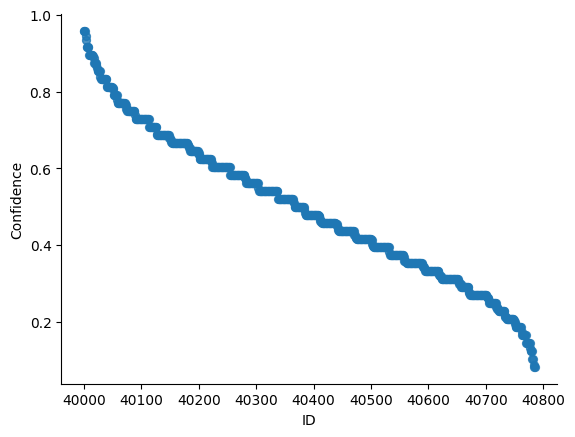

In [5]:
# shuffle the data to not have non uniformity
from matplotlib import pyplot as plt
df_sad.plot(kind='scatter', x='ID', y='Confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Make the dataset uniformly random

In [6]:
# shuffle the data to maintain the uniformity
df_sad = df_sad.sample(frac=1).reset_index(drop=True)
df_fear = df_fear.sample(frac=1).reset_index(drop=True)
df_joy = df_joy.sample(frac=1).reset_index(drop=True)

df_sad

,ID,Text,Emotion,Confidence
0,40486,@A_RockasThe U.S. has added years to the Syria...,sadness,0.417
1,40274,@groovydadad @MHChat ðŸ™‚ty I often conflate t...,sadness,0.583
2,40604,@UltimateBoxer My heart because you left me fo...,sadness,0.333
3,40181,Having holiday blues! #WantToGoBackToMinehead.,sadness,0.661
4,40692,God's love spring.Of one dat sunk his whole es...,sadness,0.271
...,...,...,...,...
781,40189,The fact I haven't had to wear a bra for a wee...,sadness,0.646
782,40102,Ill say it again. If I was a Black man Id be a...,sadness,0.729
783,40203,@MHChat #mhchat Childhood experiences inform a...,sadness,0.625
784,40227,@JohnRMoffitt This is the most grim piece of l...,sadness,0.604


In [7]:
X_train_sad = df_sad['Text']
X_train_fear = df_fear['Text']
X_train_joy = df_joy['Text']
y_train_sad = df_sad['Confidence']
y_train_fear = df_fear['Confidence']
y_train_joy = df_joy['Confidence']

In [8]:
X_test_sad = df_sad['Text']
X_test_fear = df_fear['Text']
X_test_joy = df_joy['Text']

In [15]:
!pip3 install -U scikit-learn scipy matplotlib

     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.6 kB 262.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.6 kB 281.8 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.6 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 162.6/162.6 kB 750.6 kB/s eta 0:00:00
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 3.6 MB/s eta 0:00:03
   - -------------------------------------- 0.3/7.6 MB 2.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.6 MB 2.2 MB/s eta 0:00:04
   -- -----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\share'
Consider using the `--user` option or check the permissions.



## Use TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_sad = TfidfVectorizer()
tfidf_vectorizer_fear = TfidfVectorizer()
tfidf_vectorizer_joy = TfidfVectorizer()

In [10]:
X_train_tfidf_sad = tfidf_vectorizer_sad.fit_transform(X_train_sad)
X_train_tfidf_fear = tfidf_vectorizer_fear.fit_transform(X_train_fear)
X_train_tfidf_joy = tfidf_vectorizer_joy.fit_transform(X_train_joy)

In [14]:
X_test_tfidf_sad = tfidf_vectorizer_sad.fit_transform(X_test_sad)
X_test_tfidf_fear = tfidf_vectorizer_fear.fit_transform(X_test_fear)
X_test_tfidf_joy = tfidf_vectorizer_joy.fit_transform(X_test_joy)

In [11]:
X_test_sad = df_sad_test['Text']
X_test_fear = df_fear_test['Text']
X_test_joy = df_joy_test['Text']

In [12]:
y_test_sad = df_sad_test['Confidence']
y_test_fear = df_fear_test['Confidence']
y_test_joy = df_joy_test['Confidence']

## Use Linear Regression to Predict Confidence Scores

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X_train_tfidf_sad, y_train_sad)
confidence_scores_sad = model.predict(X_test_tfidf_sad)
#confidence_scores_fear = model.predict(X_test_tfidf_fear)
#confidence_scores_joy = model.predict(X_test_tfidf_joy)

In [26]:
model.fit(X_train_tfidf_fear, y_train_fear)
confidence_scores_fear = model.predict(X_test_tfidf_fear)

In [27]:
model.fit(X_train_tfidf_joy, y_train_joy)
confidence_scores_joy = model.predict(X_test_tfidf_joy)

In [28]:
true_confidence_scores_sad = df_sad_test['Confidence']
true_confidence_scores_fear = df_fear_test['Confidence']
true_confidence_scores_joy = df_joy_test['Confidence']

In [34]:
# Pad the shorter arrays with zeros
from sklearn.metrics import mean_squared_error
import numpy as np
if len(true_confidence_scores_sad) < len(confidence_scores_sad):
    true_confidence_scores_sad = np.pad(true_confidence_scores_sad, (0, len(confidence_scores_sad) - len(true_confidence_scores_sad)), 'constant')
elif len(confidence_scores_sad) < len(true_confidence_scores_sad):
    confidence_scores_sad = np.pad(confidence_scores_sad, (0, len(true_confidence_scores_sad) - len(confidence_scores_sad)), 'constant')

if len(true_confidence_scores_fear) < len(confidence_scores_fear):
    true_confidence_scores_fear = np.pad(true_confidence_scores_fear, (0, len(confidence_scores_fear) - len(true_confidence_scores_fear)), 'constant')
elif len(confidence_scores_fear) < len(true_confidence_scores_fear):
    confidence_scores_fear = np.pad(confidence_scores_fear, (0, len(true_confidence_scores_fear) - len(confidence_scores_fear)), 'constant')

if len(true_confidence_scores_joy) < len(confidence_scores_joy):
    true_confidence_scores_joy = np.pad(true_confidence_scores_joy, (0, len(confidence_scores_joy) - len(true_confidence_scores_joy)), 'constant')
elif len(confidence_scores_joy) < len(true_confidence_scores_joy):
    confidence_scores_joy = np.pad(confidence_scores_joy, (0, len(true_confidence_scores_joy) - len(confidence_scores_joy)), 'constant')

# Recalculate the MSE
mse = mean_squared_error(true_confidence_scores_sad, confidence_scores_sad)
print("Mean Squared Error (MSE) for sad:", mse)
mse = mean_squared_error(true_confidence_scores_fear, confidence_scores_fear)
print("Mean Squared Error (MSE) for fear:", mse)
mse = mean_squared_error(true_confidence_scores_joy, confidence_scores_joy)
print("Mean Squared Error (MSE) for joy:", mse)

Mean Squared Error (MSE) for sad: 0.11028309254054418
Mean Squared Error (MSE) for fear: 0.10599193024185172
Mean Squared Error (MSE) for joy: 0.10959395527071428
